In [8]:
import pandas as pd

In [10]:
# Load dataset
file_path = "C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv"
df = pd.read_csv(file_path)

In [12]:
# View the first few rows
print(df.head())

   ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator         Unit  \
0  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
2  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
3  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
4  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   

                                              Source CTS Code  \
0  National Oceanic and Atmospheric Administratio...     ECCL   
1  National Oceanic and Atmospheric Administratio...     ECCL   
2  National Oceanic and Atmospheric Administratio...     ECCL   
3  National Oceanic and Atmospheric Administratio...     ECCL   
4  National Oceanic and Atmospheric Administratio...   

In [16]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv")

# Count the number of rows
num_observations = len(df)

print(f'The number of observations is: {num_observations}')


The number of observations is: 39617


In [12]:
# Check the column names
print(df.columns)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date',
       'Value'],
      dtype='object')


In [14]:
# Remove leading 'D' or any non-date character using regex
df['Date'] = df['Date'].str.replace(r'^[A-Za-z]', '', regex=True)


In [16]:
# Convert the cleaned Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')


In [18]:
# Check for missing dates
print(df[df['Date'].isna()])


Empty DataFrame
Columns: [ObjectId, Country, ISO2, ISO3, Indicator, Unit, Source, CTS Code, CTS Name, CTS Full Descriptor, Measure, Date, Value]
Index: []


In [20]:
# Option to drop rows with missing dates
df.dropna(subset=['Date'], inplace=True)


In [22]:
# Check for missing values
print(df.isnull().sum())

ObjectId                   0
Country                    0
ISO2                   39617
ISO3                       0
Indicator                  0
Unit                       0
Source                     0
CTS Code                   0
CTS Name                   0
CTS Full Descriptor        0
Measure                    0
Date                       0
Value                      0
dtype: int64


In [24]:
# Handle missing values (e.g., by forward filling or interpolation)
df.ffill(inplace=True)


In [26]:
df.bfill(inplace=True)


In [28]:
import matplotlib.pyplot as plt

In [29]:
print(df.columns)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date',
       'Value'],
      dtype='object')


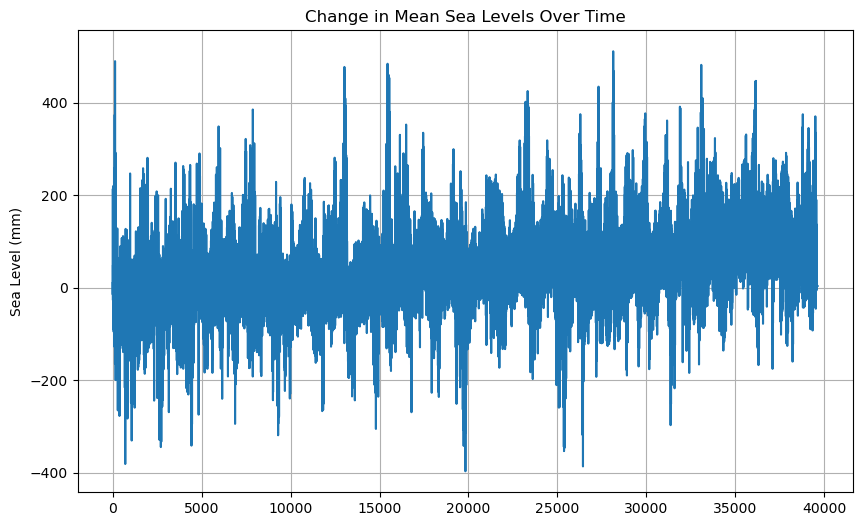

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'])  # Assuming 'Value' is the correct column for sea levels
plt.title('Change in Mean Sea Levels Over Time')
plt.ylabel('Sea Level (mm)')  # Adjust the label as per the actual unit
plt.grid(True)
plt.show()


In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
df.set_index('Date', inplace=True)


In [51]:
# Check the frequency of the index
print(df.index.inferred_freq)


None


In [55]:
print(df.dtypes)

ObjectId                 int64
Country                 object
ISO2                   float64
ISO3                    object
Indicator               object
Unit                    object
Source                  object
CTS Code                object
CTS Name                object
CTS Full Descriptor     object
Measure                 object
Value                  float64
dtype: object


In [57]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


In [59]:
print(df['Value'].isna().sum())

0


In [61]:
df.dropna(subset=['Value'], inplace=True)


In [75]:
# Check column names
print("Column names:", df.columns.tolist())

# Check the first few rows of the DataFrame
print("DataFrame head:")
print(df.head())

# Check the shape of the DataFrame
print("DataFrame shape:", df.shape)

# Check the data types of the columns
print("DataFrame dtypes:")
print(df.dtypes)


Column names: ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Value']
DataFrame head:
            ObjectId Country  ISO2 ISO3  \
Date                                      
1992-12-16         1   World   NaN  WLD   
1992-12-17         2   World   NaN  WLD   
1992-12-17         3   World   NaN  WLD   
1992-12-17         4   World   NaN  WLD   
1992-12-17         5   World   NaN  WLD   

                                                    Indicator         Unit  \
Date                                                                         
1992-12-16  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1992-12-17  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1992-12-17  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1992-12-17  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1992-12-17  Change in mean sea level: Sea level: TOPEX.Pos... 

In [87]:
df = pd.read_csv("C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv")  # Adjust the path as needed


In [89]:
# Example: If the actual column name is 'Sea Level ' with an extra space
df.rename(columns={'Sea Level ': 'Sea Level'}, inplace=True)


In [93]:
df.rename(columns={'actual_column_name': 'Sea_Level'}, inplace=True)


In [95]:
# Access the 'Sea_Level' column if it exists
if 'Sea_Level' in df.columns:
    decomposition = seasonal_decompose(df['Sea_Level'], model='additive')
    decomposition.plot()
else:
    print("'Sea_Level' column is not found in the DataFrame. Please check the column name.")

'Sea_Level' column is not found in the DataFrame. Please check the column name.


In [109]:
df['Date'] = pd.date_range(start='2000-01-01', periods=len(df), freq='D')  # Use daily frequency instead


In [129]:
import pandas as pd

# Assuming df is already defined

# Check the length of your dataset
df_length = len(df)
print(f"Dataset length: {df_length}")

# Set a maximum cap for periods to prevent out of bounds error
max_periods = 1000  # You can adjust this based on your expected data range

# Generate a limited number of periods based on your DataFrame length
num_periods = min(df_length, max_periods)

# Generate a date range with a starting point and the number of periods
# Here, I'm going to use 1950 and adjust if necessary
try:
    # If the number of periods is too large, we limit it again
    df['Date'] = pd.date_range(start='1950-01-01', periods=num_periods, freq='M')
    
    # If you want to fill in the remaining entries with NaT (Not a Time)
    if num_periods < df_length:
        # Create an additional date range for the remaining entries
        additional_periods = df_length - num_periods
        additional_dates = pd.date_range(start='1950-01-01', periods=additional_periods, freq='M')
        df['Date'] = df['Date'].append(additional_dates, ignore_index=True)

    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)

    print("Date column successfully added.")
except Exception as e:
    print("Error generating date range:", e)


Dataset length: 39617
Error generating date range: Length of values (1000) does not match length of index (39617)


In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Print the columns in the DataFrame
print("Columns in DataFrame:", df.columns)

# Strip whitespace from column names if needed
df.columns = df.columns.str.strip()

# Check if 'Sea_Level' is in the DataFrame
if 'Sea_Level' in df.columns:
    # Decompose the time series (Sea_Level variable)
    decomposition = seasonal_decompose(df['Sea_Level'], model='additive')

    # Plot the decomposed components
    decomposition.plot()
else:
    print("Column 'Sea_Level' not found in the DataFrame.")


Columns in DataFrame: Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Value'],
      dtype='object')
Column 'Sea_Level' not found in the DataFrame.


In [147]:
import pandas as pd

# Load dataset
file_path = "C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv"
df = pd.read_csv(file_path)

# Display column names
print("Column Names:")
print(df.columns.tolist())

# Display first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df.head())


Column Names:
['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date', 'Value']

First Few Rows:
   ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator         Unit  \
0  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
2  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
3  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
4  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   

                                              Source CTS Code  \
0  National Oceanic and Atmospheric Administratio...     ECCL   
1  National Oceanic and Atmospheric Administratio...     ECCL   
2  Natio

In [153]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load dataset
file_path = "C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Display column names and check for the target column
print("Column Names:")
print(df.columns.tolist())

# Select the column for ADF test
adf_column_name = df.columns[1]  # Adjust this index as needed

# Check for non-numeric values in the selected column
print("Unique values in the selected column:")
print(df[adf_column_name].unique())

# Convert to numeric, dropping non-numeric values
df[adf_column_name] = pd.to_numeric(df[adf_column_name], errors='coerce')

# Check NaN values after conversion
print("NaN values after conversion:", df[adf_column_name].isna().sum())

# Remove NaN values
df_cleaned = df.dropna(subset=[adf_column_name])

# Check the number of valid entries and the first few rows of cleaned DataFrame
print("Number of valid entries in cleaned DataFrame:", df_cleaned[adf_column_name].count())
print("First few rows of cleaned DataFrame:")
print(df_cleaned.head())

# Perform ADF test only if there are valid entries
if df_cleaned[adf_column_name].count() > 0:
    result = adfuller(df_cleaned[adf_column_name])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
else:
    print("No valid entries left for ADF test.")


Column Names:
['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date', 'Value']
Unique values in the selected column:
['World']
NaN values after conversion: 39617
Number of valid entries in cleaned DataFrame: 0
First few rows of cleaned DataFrame:
Empty DataFrame
Columns: [ObjectId, Country, ISO2, ISO3, Indicator, Unit, Source, CTS Code, CTS Name, CTS Full Descriptor, Measure, Date, Value]
Index: []
No valid entries left for ADF test.


In [159]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
file_path = "C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Display column names to find the correct one
print("Column Names in DataFrame:")
print(df.columns.tolist())

# Check for unique values in potential column of interest
print("Unique values in the DataFrame:")
print(df.head())

# Select the correct column for ARIMA model based on the column names printed
# Replace 'Sea_Level' with the correct column name found
adf_column_name = 'Mean Sea Level'  # Replace with the correct name found

# Ensure the column exists in DataFrame
if adf_column_name in df.columns:
    # Convert the column to numeric if necessary
    df[adf_column_name] = pd.to_numeric(df[adf_column_name], errors='coerce')

    # Drop rows with NaN values in the selected column
    df_cleaned = df.dropna(subset=[adf_column_name])

    # Fit the ARIMA model if there are valid entries
    if df_cleaned[adf_column_name].count() > 0:
        model = ARIMA(df_cleaned[adf_column_name], order=(1, 1, 1))
        model_fit = model.fit()
        print(model_fit.summary())
    else:
        print("No valid entries left for ARIMA model fitting.")
else:
    print(f"The column '{adf_column_name}' does not exist in the DataFrame.")


Column Names in DataFrame:
['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date', 'Value']
Unique values in the DataFrame:
   ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator         Unit  \
0  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
2  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
3  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
4  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   

                                              Source CTS Code  \
0  National Oceanic and Atmospheric Administratio...     ECCL   
1  National Oceanic and Atmospheric Administr

In [169]:
import pandas as pd

# Load dataset
file_path = "C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv"
df = pd.read_csv(file_path)

# Display the DataFrame structure and first few rows
print("DataFrame Structure:")
print(df.info())  # Shows the data types and non-null counts
print("\nFirst few rows of the DataFrame:")
print(df.head())  # Shows the first few rows of the DataFrame

# Clean column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# Print cleaned column names
print("\nCleaned Column Names:")
print(df.columns.tolist())


DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39617 entries, 0 to 39616
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             39617 non-null  int64  
 1   Country              39617 non-null  object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 39617 non-null  object 
 4   Indicator            39617 non-null  object 
 5   Unit                 39617 non-null  object 
 6   Source               39617 non-null  object 
 7   CTS Code             39617 non-null  object 
 8   CTS Name             39617 non-null  object 
 9   CTS Full Descriptor  39617 non-null  object 
 10  Measure              39617 non-null  object 
 11  Date                 39617 non-null  object 
 12  Value                39617 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB
None

First few rows of the DataFrame:
   ObjectId Countr

In [171]:
from statsmodels.tsa.arima.model import ARIMA

# Assume 'Correct_Column_Name' is the name you identified
correct_column_name = 'Correct_Column_Name'  # Replace with actual name

# Check if the column exists
if correct_column_name in df.columns:
    # Convert the column to numeric, coercing errors to NaN
    df[correct_column_name] = pd.to_numeric(df[correct_column_name], errors='coerce')

    # Drop rows with NaN values in the selected column
    df_cleaned = df.dropna(subset=[correct_column_name])

    # Fit the ARIMA model if there are valid entries
    if df_cleaned[correct_column_name].count() > 0:
        model = ARIMA(df_cleaned[correct_column_name], order=(1, 1, 1))
        model_fit = model.fit()
        print(model_fit.summary())
    else:
        print("No valid entries left for ARIMA model fitting.")
else:
    print(f"The column '{correct_column_name}' does not exist in the DataFrame.")


The column 'Correct_Column_Name' does not exist in the DataFrame.


Column Names: ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Measure', 'Date', 'Value']
NaT values in Date column: 0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                39617
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -214151.692
Date:                Tue, 01 Oct 2024   AIC                         428309.384
Time:                        20:54:47   BIC                         428335.145
Sample:                             0   HQIC                        428317.542
                              - 39617                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0239      0.005     -4.928      0.000      -0.033      -0.014
ma.L1         -0.9761      0.001   -945.106      0.000      -0.978      -0.974
sigma2      2902.7032     10.466    277.335      0.0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


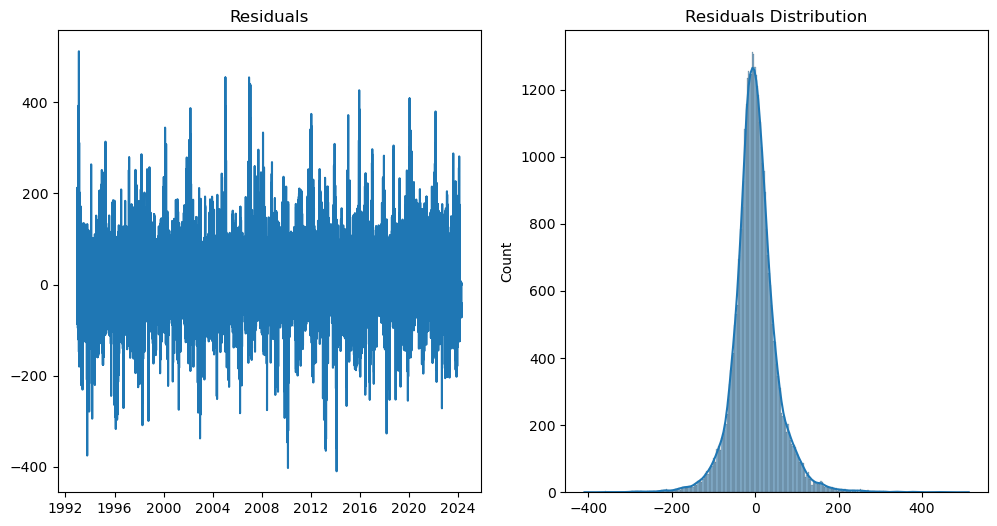

       lb_stat     lb_pvalue
10  327.544901  2.301189e-64
Forecasted Values:
39617    43.105088
39618    42.154861
39619    42.177527
39620    42.176987
39621    42.177000
39622    42.176999
39623    42.176999
39624    42.176999
39625    42.176999
39626    42.176999
Name: predicted_mean, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


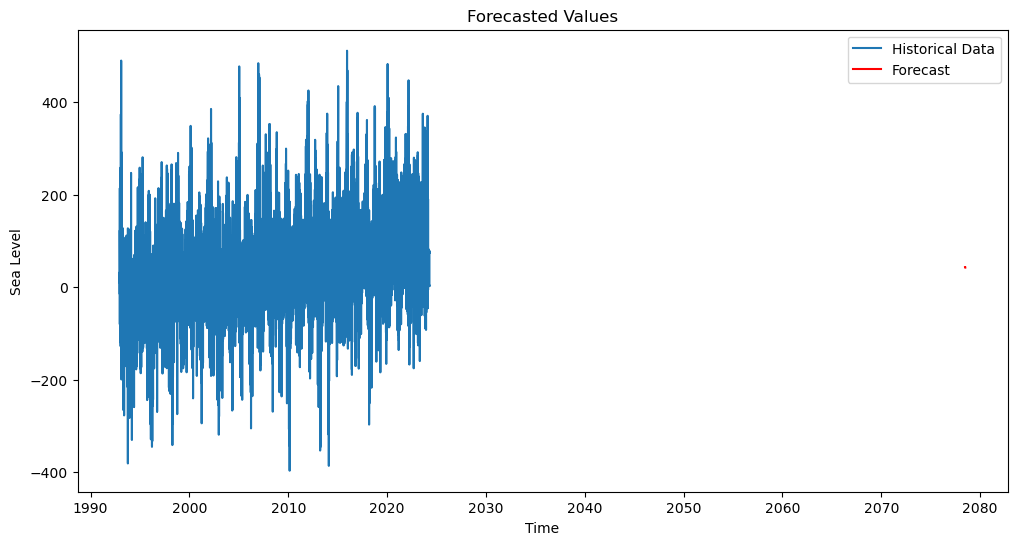

In [191]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load your DataFrame (make sure to adjust the file path)
df = pd.read_csv('C:/Users/Muraa/Downloads/Indicator_3_3_melted_new_1933432911181703772.csv')

# Print the column names
print("Column Names:", df.columns.tolist())

# Clean the 'Date' column: Remove any prefixes like 'D'
df['Date'] = df['Date'].str.replace('D', '', regex=False)  # Remove 'D' or any other unwanted characters

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Using errors='coerce' will convert invalid dates to NaT

# Check for any NaT values in the Date column after conversion
print("NaT values in Date column:", df['Date'].isna().sum())

# Set 'Date' as the index (optional but recommended for time series)
df.set_index('Date', inplace=True)

# Fit the ARIMA model using the 'Value' column
model = ARIMA(df['Value'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Check residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Ljung-Box test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

# Forecasting
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecasted Values:")
print(forecast)

# Visualize Forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Historical Data')  # Ensure to use the 'Value' column here
plt.plot(range(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')
plt.title('Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Sea Level')  # Update this label based on your data
plt.legend()
plt.show()


In [195]:
import numpy as np

# Let's say your forecast is for the next 10 periods
forecast_steps = 10

# Create synthetic actual values (for example purposes)
# This should ideally be replaced with your actual data
actual_values = pd.Series(np.random.rand(forecast_steps) * 10, index=range(len(df), len(df) + forecast_steps))

# Calculate metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = mean_squared_error(actual_values, forecast, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 35.33838173448804
Mean Squared Error (MSE): 1257.4922692785035
Root Mean Squared Error (RMSE): 35.46113745043302


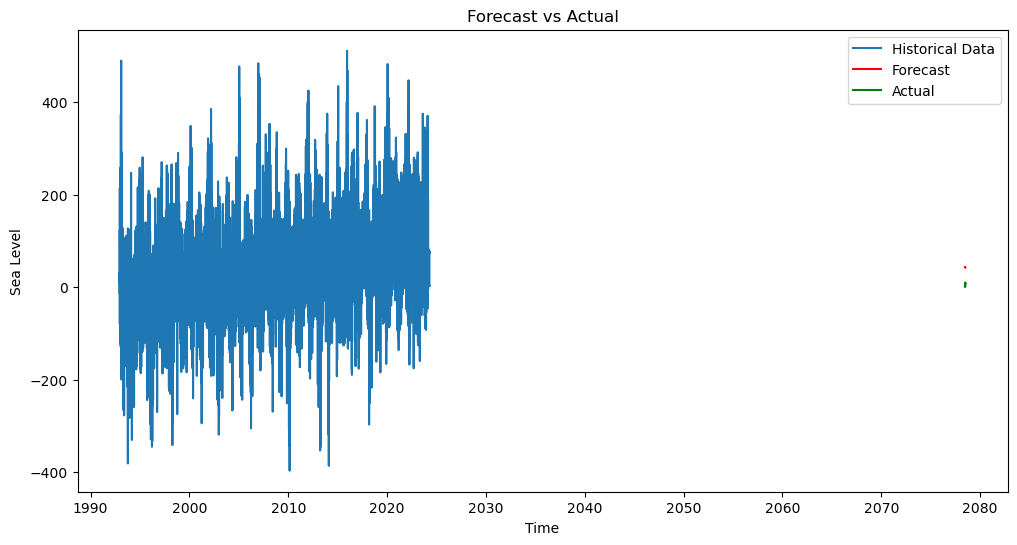

In [197]:
# Plot Forecast vs Actual
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Historical Data')
plt.plot(range(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')
plt.plot(range(len(df), len(df) + forecast_steps), actual_values, label='Actual', color='green')  # Replace actual_values with your actual data
plt.title('Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Sea Level')  # Update this label based on your data
plt.legend()
plt.show()


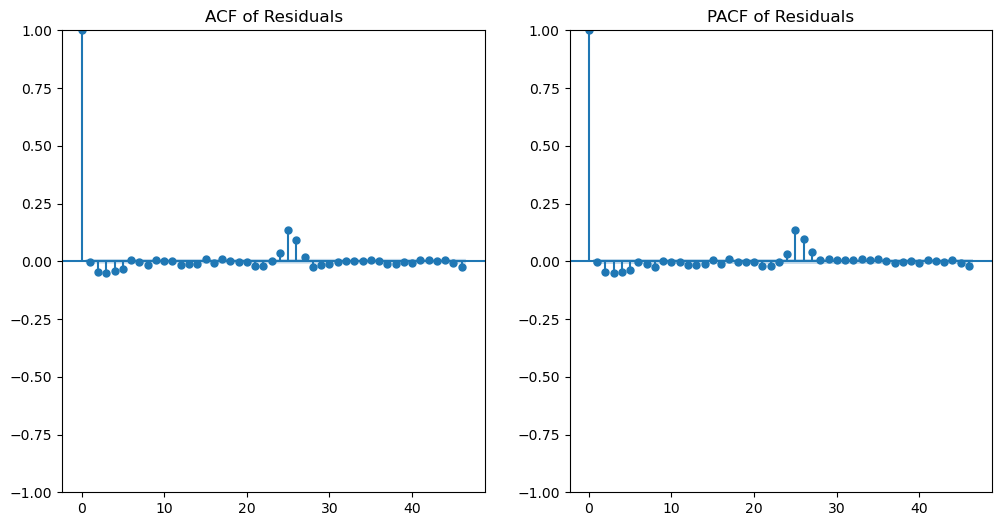

In [199]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


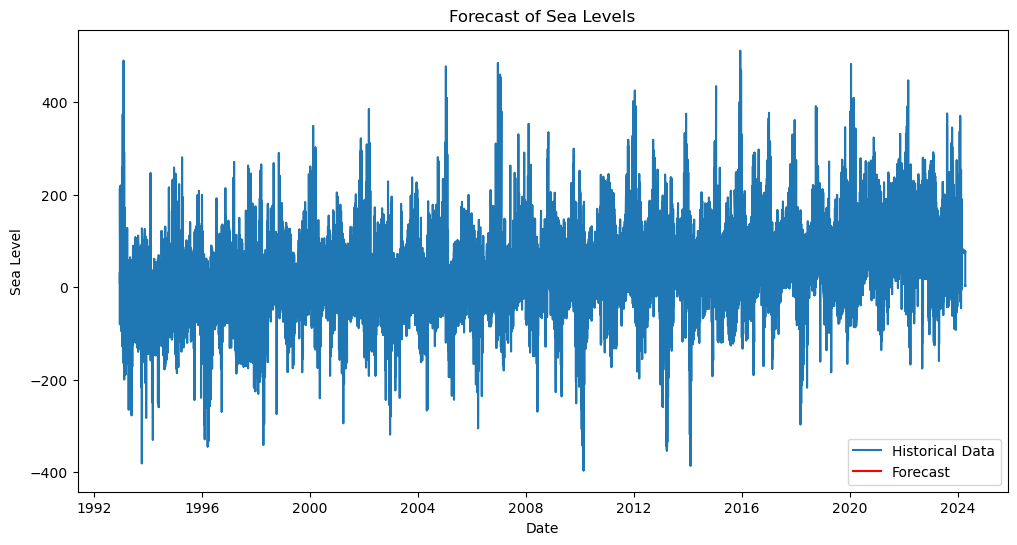

In [201]:
# Forecasting future values
forecast_steps = 10  # Specify how many steps ahead you want to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')  # Adjust frequency as needed

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Historical Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Forecast of Sea Levels')
plt.xlabel('Date')
plt.ylabel('Sea Level')  # Adjust based on your data
plt.legend()
plt.show()


In [203]:
import joblib

# Save the model
joblib.dump(model_fit, 'arima_model.pkl')


['arima_model.pkl']

In [209]:
from pmdarima import auto_arima

# Automatically determine the optimal p, d, q values
model_auto = auto_arima(df['Value'], seasonal=False, stepwise=True, trace=True)
model_auto.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=428307.047, Time=28.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=455774.703, Time=1.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=444956.219, Time=3.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=428331.321, Time=13.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=455772.703, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=428335.167, Time=16.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=428223.481, Time=29.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=428311.354, Time=22.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=440501.024, Time=4.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=428107.133, Time=42.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=437900.256, Time=5.91 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=428007.849, Time=50.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=436130.745, Time=6.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=427931.622, Time=61.17 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                39617
Model:               SARIMAX(5, 1, 2)   Log Likelihood             -213847.093
Date:                Tue, 01 Oct 2024   AIC                         427710.185
Time:                        21:15:32   BIC                         427778.881
Sample:                             0   HQIC                        427731.939
                              - 39617                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9401      0.007    136.373      0.000       0.927       0.954
ar.L2         -0.0252      0.007     -3.671      0.000      -0.039      -0.012
ar.L3         -0.0077      0.007     -1.120      0.263      -0.021       0.006
ar.L4          0.0090      0.007      1.284      0.199      -0.005       0.023
ar.L5          0.0211      0.005      3.917      0.000       0.011       0.032
ma.L1         -1.9461      0.005   -394.667      0.000      -1.956      -1.936
ma.L2          0.9483      0.005    199.391      0.000       0.939       0.958
sigma2      2879.7502     11.026    261.170      0.000    2858.139    2901.361
===================================================================================
Ljung-Box (L1) (Q):                   3.55   Jarque-Bera (JB):             55251.66
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.44
Prob(H) (two-sided):                  0.53   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

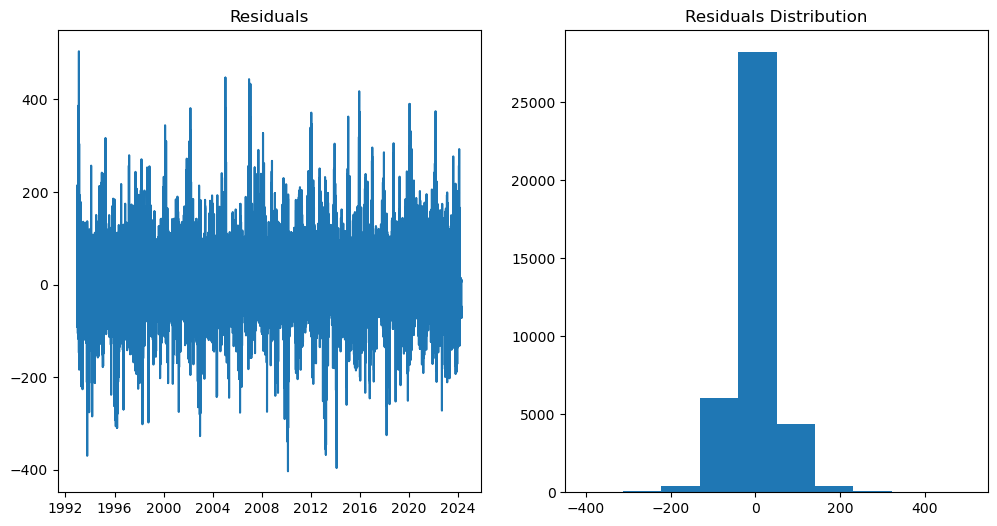

In [233]:
# Check residuals of the new model
residuals = model_auto.resid()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(1, 2, 2)
plt.hist(residuals)
plt.title('Residuals Distribution')
plt.show()


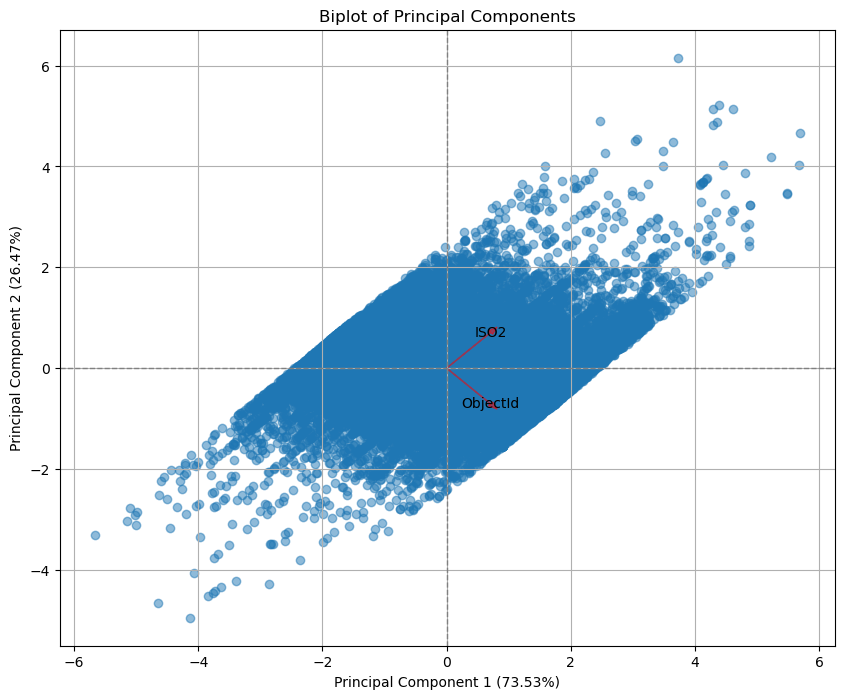

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data_path = r"C:\Users\Muraa\Downloads\Indicator_3_3_melted_new_1933432911181703772.csv"
data = pd.read_csv(data_path)

# Preprocess the data
# Assuming you want to exclude non-numeric columns (if any)
data_numeric = data.select_dtypes(include=[np.number])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a biplot
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)

# Check the number of components
n_components = pca.components_.shape[1]

# Add vectors for original features
for i in range(n_components):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='r', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[0, i], pca.components_[1, i], 
             data_numeric.columns[i], color='black', ha='center', va='center')

plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
plt.title('Biplot of Principal Components')
plt.grid()
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.show()
